In [22]:
# Importing necessary libraries for data manipulation, visualization, and deep learning
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

import tensorflow as tf  # Deep learning library
from tensorflow import keras  # High-level API for building and training neural networks
from tensorflow.keras import layers  # Module for defining layers in neural networks

In [18]:
# Importing necessary libraries for dataset loading, data splitting, and data preprocessing
from sklearn.datasets import load_diabetes  # Library for loading the diabetes dataset
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Library for feature scaling

# Loading the diabetes dataset
data = load_diabetes()

# Printing the description of the dataset
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [17]:

# Assigning features (X) and target variable (y) from the loaded diabetes dataset
X = data["data"]  # Features
y = data["target"]  # Target variable

# Splitting the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and the rest for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fitting the scaler to the training data

# Transforming both training and testing features using the fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Printing the shape of the transformed training features
print(X_train.shape)

(353, 10)


In [19]:
# Creating a sequential model
mdl = keras.Sequential()

# Adding layers to the model
mdl.add(layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(1, activation="linear"))

# Early stopping callback to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)

# Compiling the model
mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])

# Training the model
# Using validation_split=0.1 for validation data, and early stopping callback
history = mdl.fit(X_train, y_train, epochs=500, verbose=0, validation_split=0.1, callbacks=[early_stop])

# Evaluating the model on the training data
train_loss, train_mape = mdl.evaluate(X_train, y_train)

# Evaluating the model on the test data
test_loss, test_mape = mdl.evaluate(X_test, y_test)

# Printing the evaluation results
print("Training Loss:", train_loss)
print("Training MAPE:", train_mape)
print("Test Loss:", test_loss)
print("Test MAPE:", test_mape)


C:\Users\Hefes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2561.4656 - mape: 34.0221 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3075.3799 - mape: 36.6053 
Training Loss: 2634.492431640625
Training MAPE: 35.66745376586914
Test Loss: 2907.01416015625
Test MAPE: 36.797271728515625


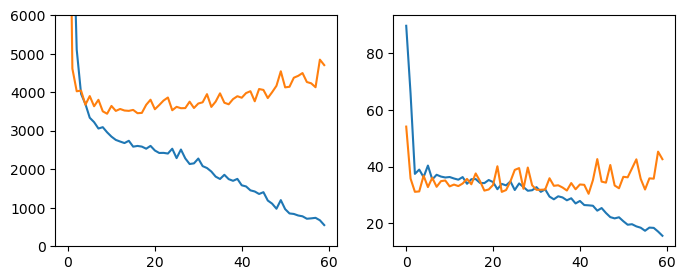

In [6]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylim([0,6000])

plt.subplot(1,2,2)

plt.plot(history.history["mape"])
plt.plot(history.history["val_mape"])
